In [1]:
# !pip install opencv-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import os
import cv2

In [2]:
# path to the training dataset
data_path = 'C:\\Users\\arif shaikh\\Downloads\\codeclause\\task2\\Training'
classes = {'no_tumor': 0, 'glioma_tumor': 1}

In [3]:
# imgs in X and targets in y
X = []
Y = []

for cls in classes:
    pth = 'C:\\Users\\arif shaikh\\Downloads\\codeclause\\task2\\Training\\'+cls
    for j in os.listdir(pth):
        #read img in gray scale mode(0)
        img = cv2.imread(pth+'/'+j, 0)  
        #resize all img to one size for model
        img = cv2.resize(img, (200,200))      
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    826
0    395
dtype: int64

In [7]:
# Reshape X to flatten the image matrix
X.shape, X_updated.shape

((1221, 200, 200), (1221, 40000))

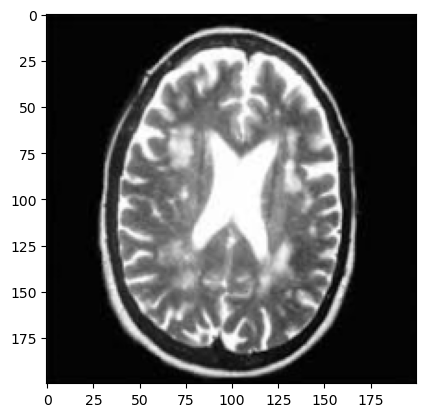

In [8]:
plt.imshow(X[7], cmap='gray')

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [10]:
xtrain.shape, xtest.shape

((976, 40000), (245, 40000))

In [11]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
# pca can be performed to select only useful feautes

In [14]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [15]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9825819672131147
Testing Score: 0.9591836734693877


In [16]:
pred = sv.predict(xtest)

In [17]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  3,  22,  51,  57,  65,  80, 120, 126, 153, 212], dtype=int64),)

In [18]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[3],ytest[3])

Total Misclassified Samples:  10
1 0


In [19]:
dec = {0:'No Tumor', 1:'Glioma Tumor'}

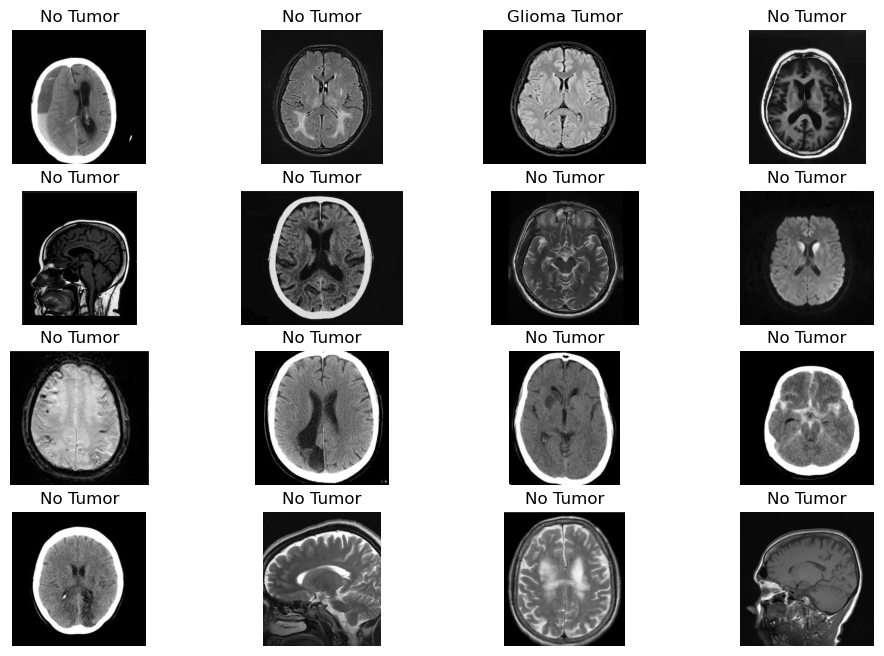

In [22]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\arif shaikh\\Downloads\\codeclause\\task2\\Testing\\')
# counter
c=1
for i in os.listdir('C:\\Users\\arif shaikh\\Downloads\\codeclause\\task2\\Testing\\no_tumor\\')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:\\Users\\arif shaikh\\Downloads\\codeclause\\task2\\Testing\\no_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

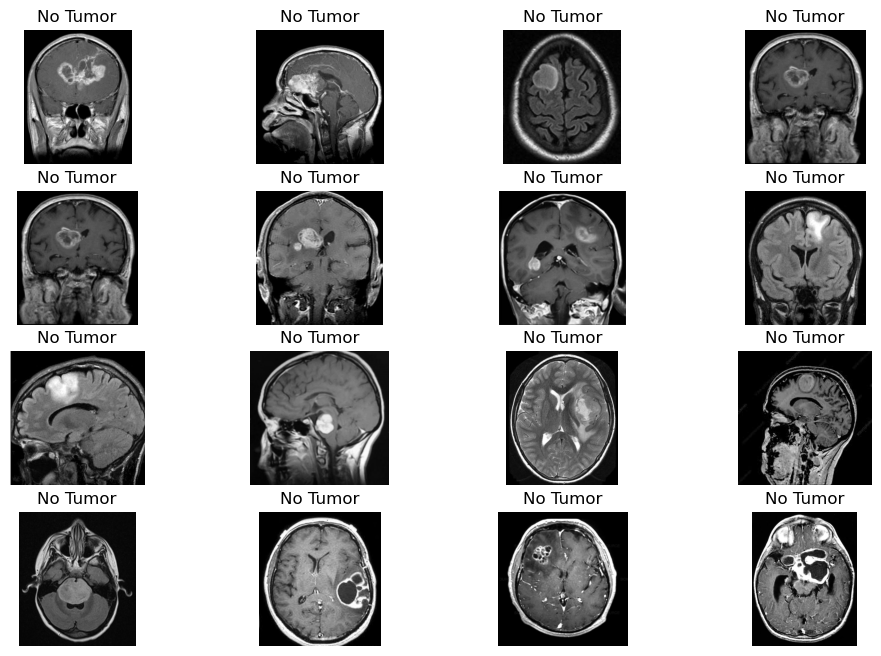

In [21]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\arif shaikh\\Downloads\\codeclause\\task2\\Testing\\')
c=1
for i in os.listdir('C:\\Users\\arif shaikh\\Downloads\\codeclause\\task2\\Testing\\glioma_tumor\\')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:\\Users\\arif shaikh\\Downloads\\codeclause\\task2\\Testing\\glioma_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1